In [3]:
import numpy as np
import os
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
data_src = "https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip"
data_dir = tf.keras.utils.get_file(origin=data_src,cache_dir="/content/", extract=True)
data_dir = pathlib.Path(data_dir)


109540975/109540975 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [5]:
!ls datasets/pizza_steak.zip/pizza_steak/
# data_dir


test  train


In [6]:

for dirpath,dirname,filenames in os.walk(data_dir):
  print(f"There are {dirname} directories and {len(filenames)} images in '{dirpath}'.")

There are ['pizza_steak'] directories and 0 images in '/content/datasets/pizza_steak.zip'.
There are ['train', 'test'] directories and 0 images in '/content/datasets/pizza_steak.zip/pizza_steak'.
There are ['pizza', 'steak'] directories and 0 images in '/content/datasets/pizza_steak.zip/pizza_steak/train'.
There are [] directories and 750 images in '/content/datasets/pizza_steak.zip/pizza_steak/train/pizza'.
There are [] directories and 750 images in '/content/datasets/pizza_steak.zip/pizza_steak/train/steak'.
There are ['pizza', 'steak'] directories and 0 images in '/content/datasets/pizza_steak.zip/pizza_steak/test'.
There are [] directories and 250 images in '/content/datasets/pizza_steak.zip/pizza_steak/test/pizza'.
There are [] directories and 250 images in '/content/datasets/pizza_steak.zip/pizza_steak/test/steak'.


In [7]:
# os.listdir(data_dir + "/pizza_steak/train")

In [8]:
image_count = len(list(pathlib.Path(data_dir).glob('*/*/*/*')))
print(image_count)

2000


/content/datasets/pizza_steak.zip/pizza_steak/train/pizza/608085.jpg


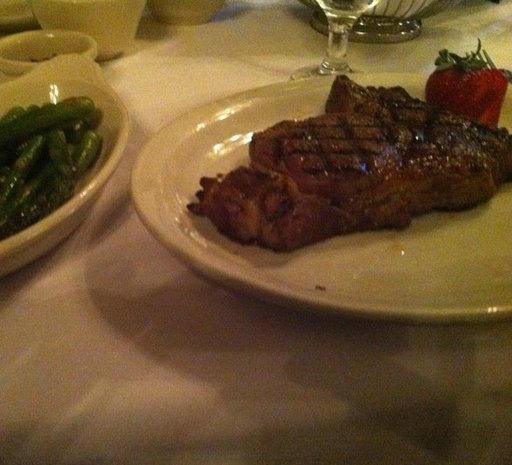

In [9]:
from PIL import Image
train_images = list(pathlib.Path(data_dir).glob('*/*/*/*'))
print(str(train_images[0]))
Image.open(train_images[751])

In [10]:
train_dir = str(list(data_dir.glob("*/*train"))[0])
test_dir = str(list(data_dir.glob("*/*test"))[0])
train_dir


'/content/datasets/pizza_steak.zip/pizza_steak/train'

In [11]:
tf.random.set_seed(42)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# scaling the images
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


# get the images from direcrory and put them in batch_sizes
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224,224),
    class_mode = "binary",
    batch_size = 32,
    seed=42
    )
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224), # all image will 224X224 pixel
    class_mode = "binary", # binary beacuse we have two classes
    batch_size = 32, # batch_size 32 mean tha 32 images are load to memory at same time than 32 and so on  train_image/32
    seed=42
    )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [12]:
len(train_data) # total 47 batches train_images 1500/ 32 = 47

47

In [13]:
train_data[43][0].shape  #(32= 32 image load, width = 224, height= 224, color channel = 3 red, green, blue)

(32, 224, 224, 3)

In [14]:
sum(train_data.classes[749:])

750

In [15]:
classes = list(train_data.class_indices.keys())
images, labels = train_data[0]


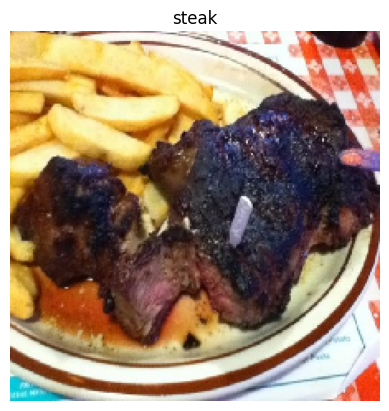

In [16]:
plt.imshow(images[1])
plt.title(classes[int(labels[1])])
plt.axis("off")
plt.show()

In [17]:
# shape of image
train_data[0][0][0].shape

(224, 224, 3)

In [18]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu",padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
224-3+1

222

In [21]:
model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"],

)

history = model.fit(
    train_data,
    epochs=5,
    # steps_per_epoch=len(train_data),
    validation_data=test_data,
    # validation_steps=len(test_data)
    )


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 223ms/step - accuracy: 0.5270 - loss: 1.2078 - val_accuracy: 0.7540 - val_loss: 0.5428
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.7438 - loss: 0.5537 - val_accuracy: 0.8320 - val_loss: 0.4232
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.7967 - loss: 0.4395 - val_accuracy: 0.8120 - val_loss: 0.4447
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 140ms/step - accuracy: 0.8395 - loss: 0.3761 - val_accuracy: 0.7980 - val_loss: 0.4160
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - accuracy: 0.9561 - loss: 0.1749 - val_accuracy: 0.7860 - val_loss: 0.4875


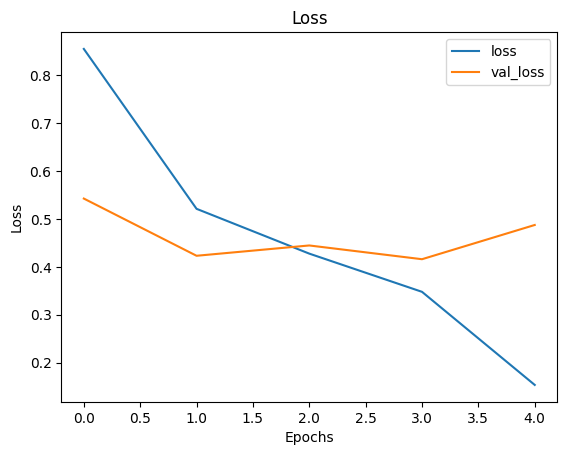

In [22]:
# check the loss for training and validataion
import pandas as pd
pd.DataFrame(history.history)[["loss","val_loss"]].plot()
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

From the graph we get the idea that the model is performing well on the training dataset.This means that the model learn to much from training dataset and the model is not perform well on unseen data like test dataset so this mean that the model is **overfitting** (perform well on training data and not on test data)

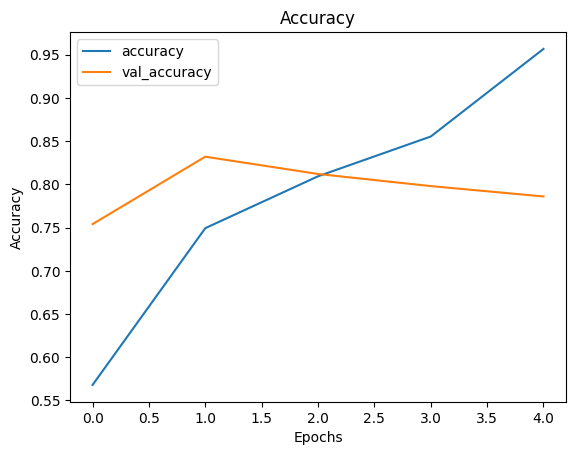

In [23]:
# accuracy for training and validation
pd.DataFrame(history.history)[["accuracy","val_accuracy"]].plot()
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = model.predict(test_data)
y_pred = np.round(y_pred).astype(int)



16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step


In [25]:
cm = confusion_matrix(test_data.classes, y_pred)

In [26]:
cm

array([[ 97, 153],
       [108, 142]])

In [27]:
def loss_and_validation_graph(history):
  pd.DataFrame(history.history)[["loss","val_loss"]].plot()
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.show()



  plt.figure()
  pd.DataFrame(history.history)[["accuracy","val_accuracy"]].plot()
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.show()

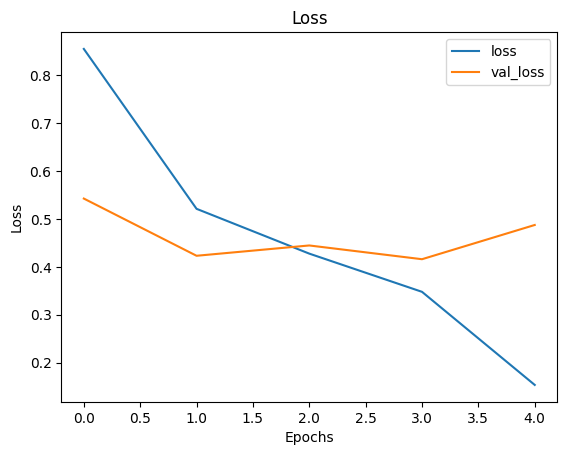

<Figure size 640x480 with 0 Axes>

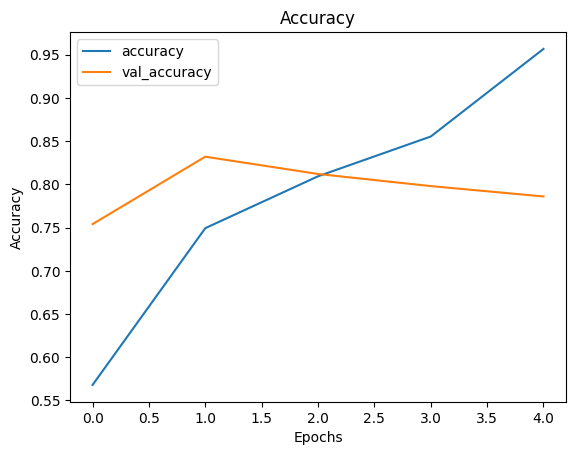

In [28]:
loss_and_validation_graph(history)

### Adjust the model parameters

0. create a baseline
1. Beat the baseline by overfitting a large model
2. Reduce overfitting

ways to induce overfitting

* Increase Convolution layers
* Increase Convolution layers filters like this 16, 32, 64 etc
* Increase dense layer after the flatten layer

way to reduce overfitting
* add Data augmentation
* add Regularization layers like Dropout, maxpool2d







In [29]:
model_two = tf.keras.Sequential([
    tf.keras.Input(shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu",padding="valid"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

])


model_two.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_two = model_two.fit(
    train_data,
    epochs=5,
    validation_data=test_data
)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step - accuracy: 0.5727 - loss: 0.6635 - val_accuracy: 0.7540 - val_loss: 0.5165
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - accuracy: 0.7793 - loss: 0.4852 - val_accuracy: 0.8120 - val_loss: 0.4171
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.7661 - loss: 0.5002 - val_accuracy: 0.8200 - val_loss: 0.3900
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - accuracy: 0.8052 - loss: 0.4356 - val_accuracy: 0.8440 - val_loss: 0.3734
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.8178 - loss: 0.4063 - val_accuracy: 0.8440 - val_loss: 0.3590


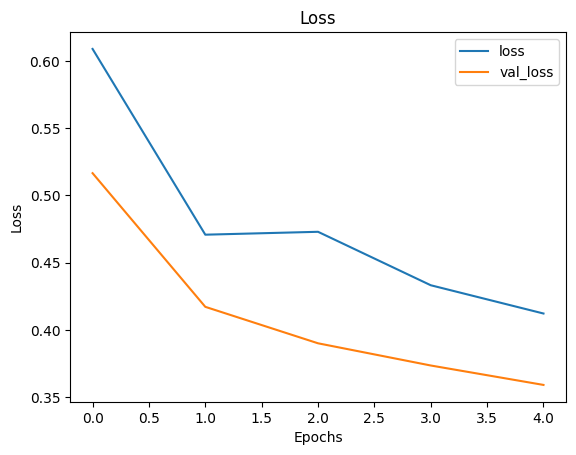

<Figure size 640x480 with 0 Axes>

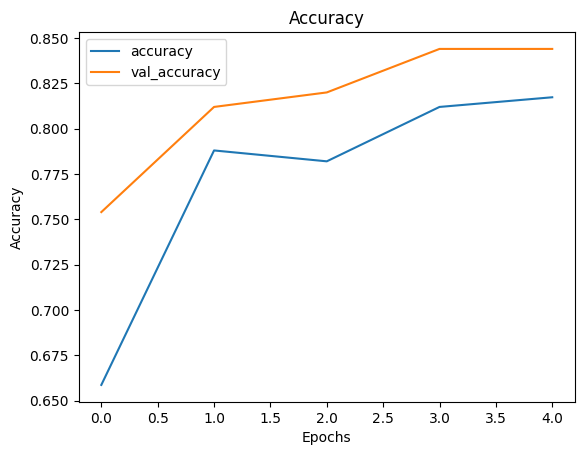

In [30]:
loss_and_validation_graph(history_two)

In [31]:
model_two.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.8272 - loss: 0.3834


[0.35899949073791504, 0.843999981880188]

In [32]:
model_two.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

### Data Augmentation
Data Augmentation is the process of  artifically generating new data from the existing data.For example by flip, rotation of images etc

In [165]:
# create image generation using ImageDataGenerator
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# train data
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)



In [34]:
# get the images from direcrory and put them in batch_sizes
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size = (224,224),
    class_mode = "binary",
    batch_size = 32,
    seed=42,
    shuffle=False
    )

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224,224),
    class_mode = "binary",
    batch_size = 32,
    seed=42,
    shuffle=False
    )

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    class_mode = "binary",
    batch_size = 32
    )



Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [35]:
len(train_data), len(train_data_augmented), len(test_data)

(47, 47, 16)

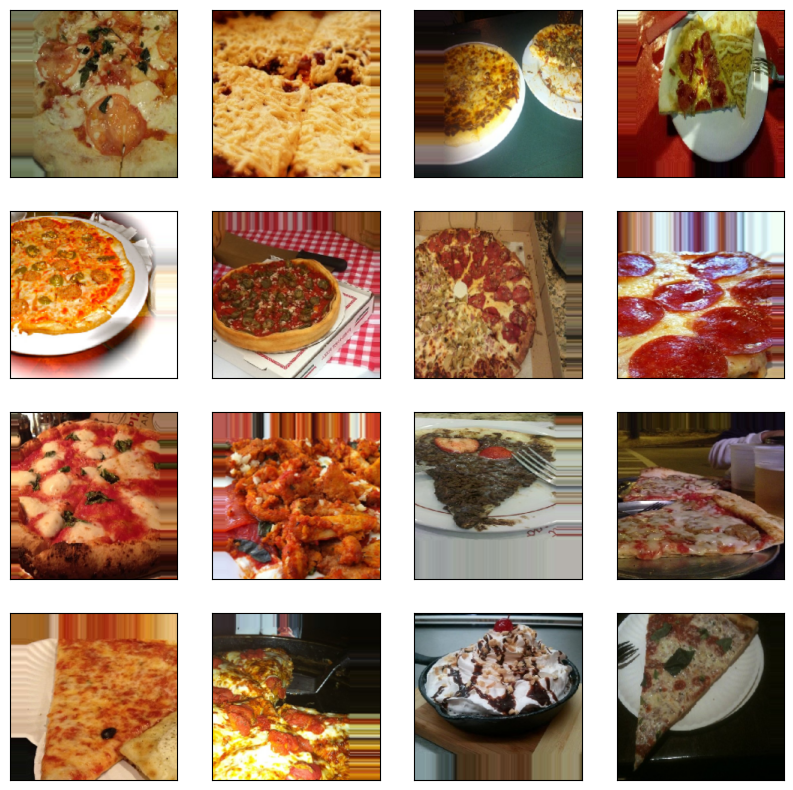

In [36]:
# train_data_augmented data
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data_augmented[0][0][i])
plt.show()

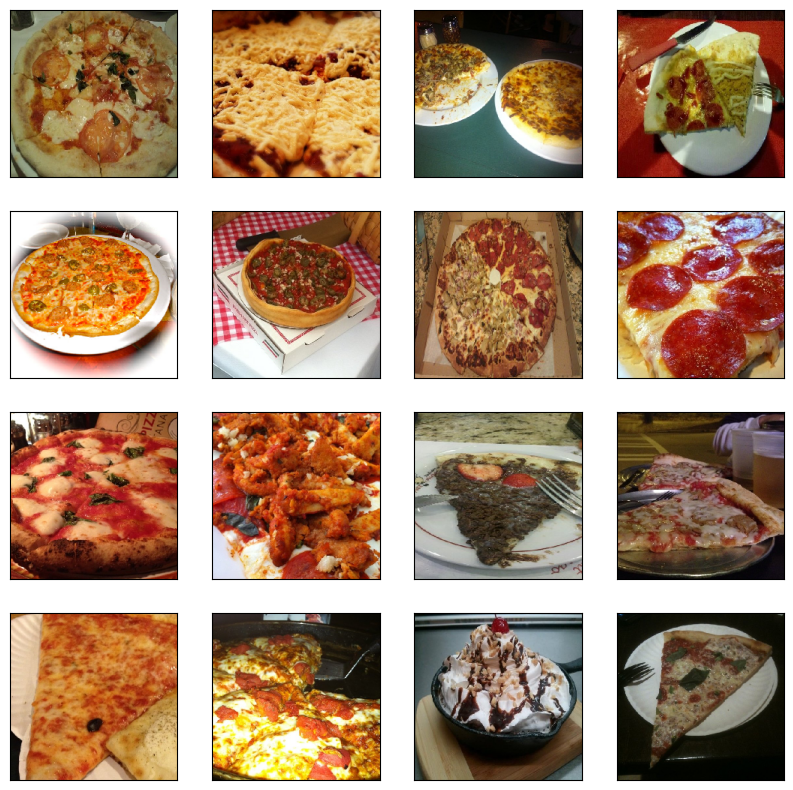

In [37]:
#

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[0][0][i])
plt.show()

### Train model on augmented data

In [38]:
model_three = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(224,224,3)),

        tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu",padding="valid"),
        tf.keras.layers.MaxPool2D(pool_size=2),

        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=2),

        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ]
)

model_three.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_three = model_three.fit(
    train_data_augmented,
    epochs=5,
    validation_data=test_data
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 445ms/step - accuracy: 0.6410 - loss: 0.8122 - val_accuracy: 0.5820 - val_loss: 0.6724
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 426ms/step - accuracy: 0.5600 - loss: 0.6871 - val_accuracy: 0.5440 - val_loss: 0.6562
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 439ms/step - accuracy: 0.6221 - loss: 0.6663 - val_accuracy: 0.7900 - val_loss: 0.6259
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 415ms/step - accuracy: 0.6048 - loss: 0.6788 - val_accuracy: 0.7120 - val_loss: 0.6474
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 435ms/step - accuracy: 0.6603 - loss: 0.6551 - val_accuracy: 0.8080 - val_loss: 0.5741


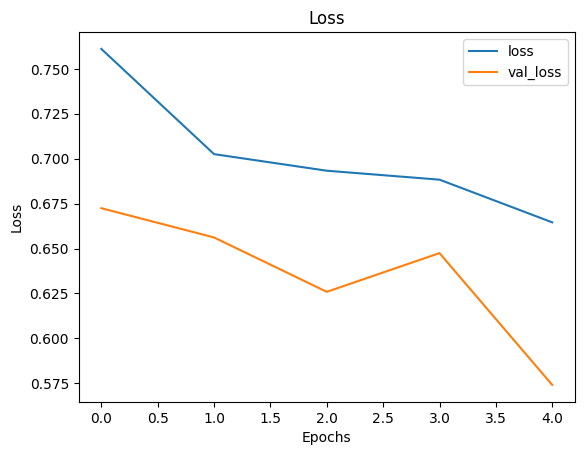

<Figure size 640x480 with 0 Axes>

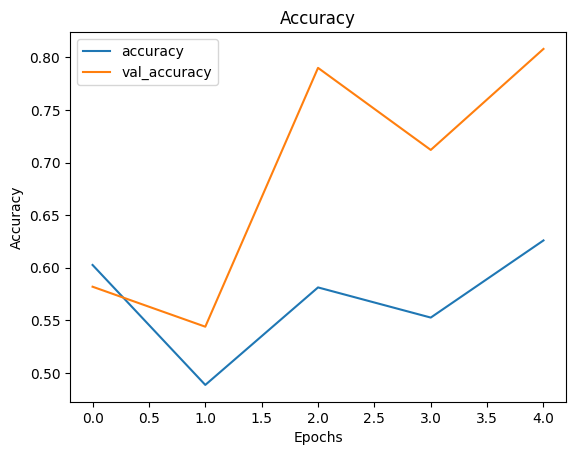

In [39]:
loss_and_validation_graph(history_three)

### Train model on shuffle Images


In [166]:
train_data_shuffle = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size = (224,224),
    class_mode = "binary",
    batch_size = 32,
    seed=42,
    )

model_four = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(224,224,3)),
        tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu",padding="valid"),
        tf.keras.layers.MaxPool2D(pool_size=2),
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=2),
        tf.keras.layers.Conv2D(16, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ]
)

model_four.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_four = model_four.fit(
    train_data_shuffle,
    epochs=5,
    validation_data=test_data
)


Found 1500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 466ms/step - accuracy: 0.5925 - loss: 0.6718 - val_accuracy: 0.7480 - val_loss: 0.4964
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 405ms/step - accuracy: 0.7525 - loss: 0.5187 - val_accuracy: 0.8340 - val_loss: 0.4051
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 424ms/step - accuracy: 0.7904 - loss: 0.4525 - val_accuracy: 0.8560 - val_loss: 0.3698
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 403ms/step - accuracy: 0.7950 - loss: 0.4483 - val_accuracy: 0.8600 - val_loss: 0.3663
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 434ms/step - accuracy: 0.7989 - loss: 0.4461 - val_accuracy: 0.8360 - val_loss: 0.3782


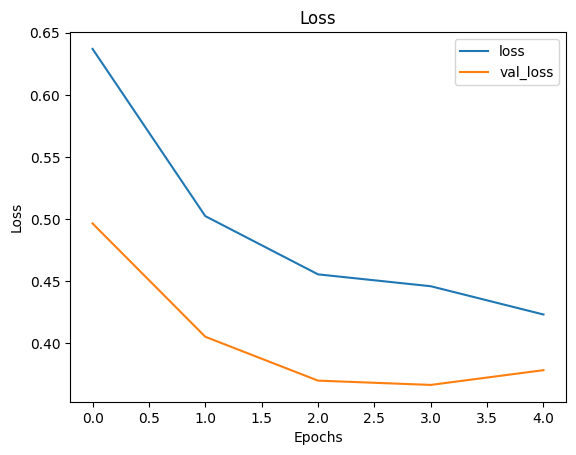

<Figure size 640x480 with 0 Axes>

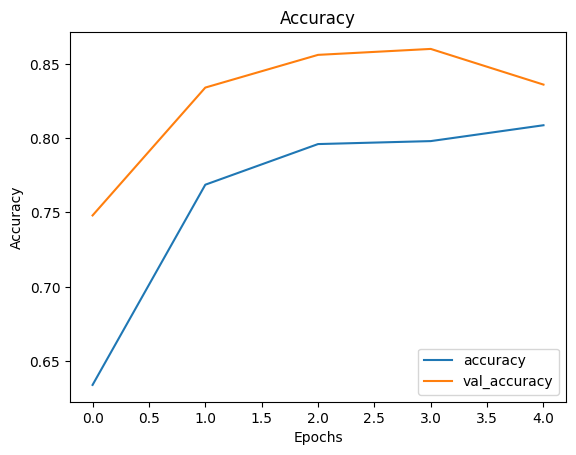

In [167]:
loss_and_validation_graph(history_four)

In [168]:
model_four.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.8531 - loss: 0.3710


[0.37823131680488586, 0.8360000252723694]

In [169]:
test_data[15][0].shape

(20, 224, 224, 3)

In [170]:
len(test_data[0])

2

In [45]:
test_data[0][0].shape

(32, 224, 224, 3)

## Predict On new Custom Data

In [114]:
!wget https://img.freepik.com/free-photo/top-view-pepperoni-pizza-with-mushroom-sausages-bell-pepper-olive-corn-black-wooden_141793-2158.jpg
!wget https://t3.ftcdn.net/jpg/01/16/36/28/360_F_116362893_5lM48e4YkHmmgIeVCun0L0Esl0lsuN8p.jpg

--2025-03-12 18:55:42--  https://img.freepik.com/free-photo/top-view-pepperoni-pizza-with-mushroom-sausages-bell-pepper-olive-corn-black-wooden_141793-2158.jpg
Resolving img.freepik.com (img.freepik.com)... 23.58.144.14, 23.58.144.64, 2600:1417:3f::173b:50f1, ...
Connecting to img.freepik.com (img.freepik.com)|23.58.144.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 132818 (130K) [image/jpeg]
Saving to: ‘top-view-pepperoni-pizza-with-mushroom-sausages-bell-pepper-olive-corn-black-wooden_141793-2158.jpg.1’

top-view-pepperoni- 100%[===================>] 129.71K  --.-KB/s    in 0.005s  

2025-03-12 18:55:42 (27.6 MB/s) - ‘top-view-pepperoni-pizza-with-mushroom-sausages-bell-pepper-olive-corn-black-wooden_141793-2158.jpg.1’ saved [132818/132818]

--2025-03-12 18:55:42--  https://t3.ftcdn.net/jpg/01/16/36/28/360_F_116362893_5lM48e4YkHmmgIeVCun0L0Esl0lsuN8p.jpg
Resolving t3.ftcdn.net (t3.ftcdn.net)... 151.101.1.91, 151.101.65.91, 151.101.129.91, ...
Connecting 

In [171]:
import numpy as np
from PIL import Image
pizza_image = "top-view-pepperoni-pizza-with-mushroom-sausages-bell-pepper-olive-corn-black-wooden_141793-2158.jpg"
steak_image = "360_F_116362893_5lM48e4YkHmmgIeVCun0L0Esl0lsuN8p.jpg"

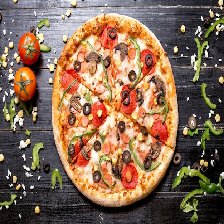

In [172]:
pizz_img = tf.keras.utils.load_img( pizza_image, target_size=(224, 224))
pizz_img

In [173]:
img_array = tf.keras.utils.img_to_array(pizz_img)
img_array =  tf.expand_dims(img_array,0)

In [175]:
predictions = model_four.predict(img_array)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


array([[0.]], dtype=float32)

In [176]:
class_names = list(train_data_shuffle.class_indices)
class_names

['pizza', 'steak']

In [177]:
class_names[int(predictions[0][0])]

'pizza'

In [178]:
# now check for steak image
steak_img = tf.keras.utils.load_img(steak_image, target_size=(224, 224))
img_array = tf.keras.utils.img_to_array(steak_img)

img_array =  tf.expand_dims(img_array,0)
img_array = img_array/255.
img_array

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.60784316, 0.5411765 , 0.43137255],
         [0.5882353 , 0.52156866, 0.4117647 ],
         [0.5882353 , 0.52156866, 0.4117647 ],
         ...,
         [0.13333334, 0.15294118, 0.0627451 ],
         [0.07058824, 0.07843138, 0.02745098],
         [0.05098039, 0.05882353, 0.01568628]],

        [[0.5647059 , 0.5019608 , 0.4117647 ],
         [0.54901963, 0.4862745 , 0.39607844],
         [0.5411765 , 0.47843137, 0.3882353 ],
         ...,
         [0.05098039, 0.05490196, 0.        ],
         [0.05098039, 0.05098039, 0.01960784],
         [0.04313726, 0.04313726, 0.00392157]],

        [[0.5529412 , 0.5019608 , 0.4392157 ],
         [0.53333336, 0.48235294, 0.41960785],
         [0.50980395, 0.45882353, 0.39607844],
         ...,
         [0.07450981, 0.04705882, 0.01568628],
         [0.07058824, 0.05098039, 0.02745098],
         [0.05098039, 0.04313726, 0.        ]],

        ...,

        [[0.06666667, 0.04705882, 

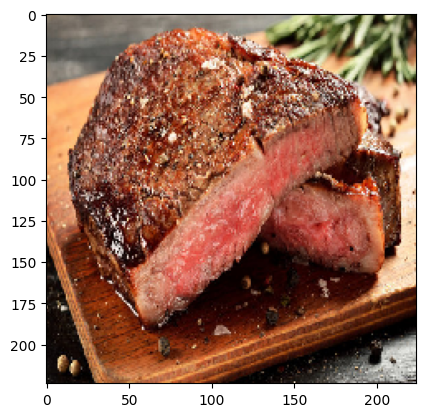

In [180]:
plt.imshow(tf.squeeze(img_array))

In [181]:
predictions_steak = model_four.predict(img_array)
predictions_steak

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


array([[0.5709129]], dtype=float32)

In [186]:
class_names[int(tf.round(predictions_steak))]

'steak'

In [187]:
# predict_show_img

def predict_show_img(img_name):
  load_img = tf.keras.utils.load_img(img_name, target_size=(224, 224))
  img_array = tf.keras.utils.img_to_array(load_img)

  img_array =  tf.expand_dims(img_array,0)
  # scaling of image
  img_array = img_array/255.

  predictions = model_four.predict(img_array)
  predictions
  plt.imshow(tf.squeeze(img_array))
  plt.title(class_names[int(tf.round(predictions))])
  plt.axis("off")
  plt.show()





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


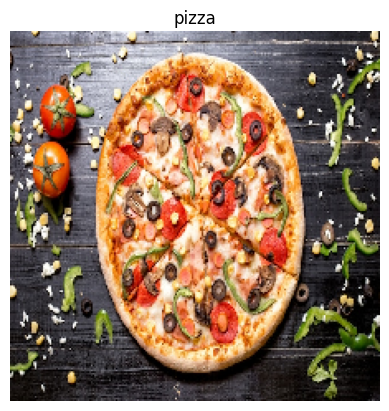

In [188]:
predict_show_img(pizza_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


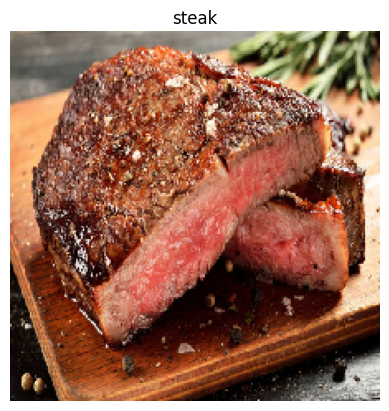

In [189]:
predict_show_img(steak_image)